In [72]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [40]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
392,ham,Morning only i can ok.,NaN,NaN,NaN
5199,ham,Ugh my leg hurts. Musta overdid it on mon.,NaN,NaN,NaN
3469,ham,aathi..where are you dear..,NaN,NaN,NaN
2841,ham,aathi..where are you dear..,NaN,NaN,NaN
3684,ham,Wake me up at &lt;#&gt; am morning:),NaN,NaN,NaN


In [41]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

df.sample(5)

,label,message
83,ham,You will be in the place of that man
2444,ham,"Yes but i dont care! I need you bad, princess!"
211,ham,Home so we can always chat
4605,ham,Oh... Haha... Den we shld had went today too.....
1452,ham,"That's good, because I need drugs"


In [42]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

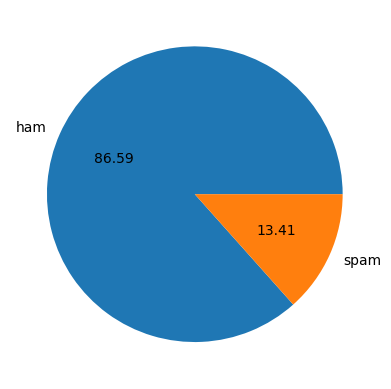

In [43]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()



In [44]:
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])
df.sample(5)

,label,message
793,0,Omg I want to scream. I weighed myself and I l...
4448,1,Urgent UR awarded a complimentary trip to Euro...
1052,0,I got another job! The one at the hospital doi...
259,0,IÛ÷m parked next to a MINI!!!! When are you c...
1054,0,HIYA COMIN 2 BRISTOL 1 ST WEEK IN APRIL. LES G...


In [46]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [47]:
df.drop_duplicates(keep='first', inplace=True)

In [49]:
df.shape

(5169, 2)

Spam doesn't just differ from ham by a single word;
it's the frequency of certain words,
the structure of the email, the presence of specific symbols or links, etc.

So We will need to create additional columns to avoid the problem of under-fitting
Cuz we just have 2 columns

So we will add columns such as number of tokens, Characters Count,...

In [65]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [66]:
df['tokens_count'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['char_count'] = df['message'].apply(len)

In [67]:
df.sample(5)

,label,message,clean_message,tokens_count,char_count
3481,1,Do you want a NEW video phone750 anytime any n...,want new video phone anytime network mins text...,27,148
5304,0,Pls ask macho how much is budget for bb bold 2...,pls ask macho much budget bb bold cos saw new ...,28,94
3829,0,I agree. So i can stop thinkin about ipad. Can...,agree stop thinkin ipad please ask macho question,20,86
2786,0,cThen i thk shd b enuff.. Still got conclusion...,cthen thk shd b enuff still got conclusion n c...,27,116
1271,0,If you still havent collected the dough pls le...,still havent collected dough pls let know go p...,26,116


In [68]:
def clean_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # tokenization 
    tokens = nltk.word_tokenize(text)
    #Remove stopwords (requires NLTK)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Example usage:
df['clean_message'] = df['message'].apply(clean_text)

In [70]:
df.drop('message', axis=1, inplace=True)
df.sample(5)

,label,clean_message,tokens_count,char_count
4232,0,love hope anything drastic dont dare sell pc p...,22,97
1193,1,sex ur mobile free sexy pic jordan text babe e...,34,155
4055,0,ha ha nan yalrigu heltiniiyo kothi chikku u sh...,68,255
4569,1,wan na laugh try chitchat mobile logon txting ...,37,156
4766,1,unique user id removal send stop customer serv...,16,89


In [74]:
stemmer = SnowballStemmer("english")

In [75]:
df['clean_message'] = df['clean_message'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [76]:
df.sample(5)

,label,clean_message,tokens_count,char_count
5542,0,armand say get ass epsilon,8,40
800,1,last chanc claim ur å£ worth discount voucher ...,34,154
247,0,kalli wont bat nd inning,7,31
2848,1,chanc realiti fantasi show call p per min ntt ...,33,151
3636,0,know hook mean right,8,34
